##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
window = (3,3)
stride = 1

model = models.Sequential()

model.add(layers.Conv2D(32, window, padding='same', input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(32, window))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(32, window, strides=stride))
model.add(layers.LeakyReLU())

model.add(layers.Conv2D(64, window))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, window))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.LeakyReLU())
model.add(layers.Dense(10))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

In [5]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
            metrics=['accuracy'])

In [13]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=256), epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 87s 436ms/step - loss: 0.5931 - accuracy: 0.7930 - val_loss: 0.5701 - val_accuracy: 0.8032
Epoch 2/10
196/196 [==============================] - 86s 437ms/step - loss: 0.5912 - accuracy: 0.7916 - val_loss: 0.6154 - val_accuracy: 0.7914
Epoch 3/10
196/196 [==============================] - 84s 428ms/step - loss: 0.5832 - accuracy: 0.7972 - val_loss: 0.5775 - val_accuracy: 0.8010
Epoch 4/10
196/196 [==============================] - 84s 427ms/step - loss: 0.5838 - accuracy: 0.7964 - val_loss: 0.6158 - val_accuracy: 0.7912
Epoch 5/10
196/196 [==============================] - 84s 428ms/step - loss: 0.5834 - accuracy: 0.7964 - val_loss: 0.6001 - val_accuracy: 0.7940
Epoch 6/10
196/196 [==============================] - 84s 428ms/step - loss: 0.5762 - accuracy: 0.7999 - val_loss: 0.6153 - val_accuracy: 0.7919
Epoch 7/10
196/196 [==============================] - 86s 437ms/step - loss: 0.5673 - accuracy: 0.8013 - val_loss: 0.5736 - val_ac

313/313 - 4s - loss: 0.5925 - accuracy: 0.7986


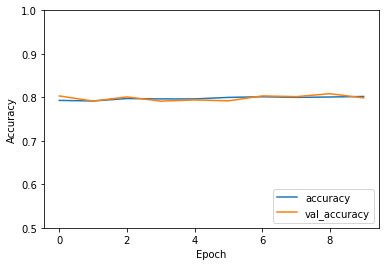

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
print(test_acc)

0.7986000180244446


In [16]:
model.save('BSSD3850-cifar10-cnn')

INFO:tensorflow:Assets written to: BSSD3850-cifar10-cnn/assets
